In [1]:
import plotnine
from plotnine import *
series_theme = theme_minimal() + plotnine.themes.theme(
    legend_direction='horizontal',
    legend_position=[.5, 0.1],
    legend_title=element_blank(),
    legend_box_spacing=.4,
    axis_text_x=element_text(rotation=25, hjust=1, size=13),
    figure_size=(4, 5),
    text=element_text(size=18),
)

%matplotlib inline


In [5]:
import pandas as pd

df_max = pd.read_csv(
    'run-notebook_pretrained_mf_replicate_testnoiseT_shuffle5Millilon_ablation_max.20230512-014924_train-tag-epoch_loss.csv')
df_robust = pd.read_csv(
    'run-notebook_pretrained_mf_replicate_testnoiseT_shuffle5Million_ablation_robust.20230512-014930_train-tag-epoch_loss.csv')




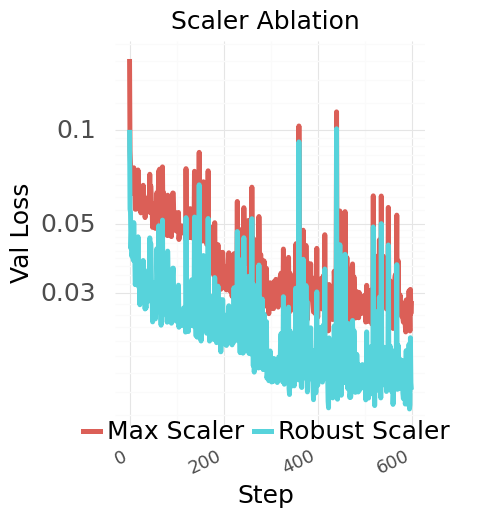

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/ablation.png


In [22]:
df = pd.merge(df_max, df_robust, on='Step', suffixes=['_max','_robust'])
df = df[[x for x in df.columns if 'Wall' not in x]]
df = df.melt('Step')
df = df.replace('Value_max', 'Max Scaler')
df = df.replace('Value_robust', 'Robust Scaler')

p_ablation = (ggplot(df)
              + aes(x='Step', y='value', color='variable')
              + geom_line(size=2)
              + series_theme
              + labs(title=f'Scaler Ablation')
              + ylab(f'Val Loss')
              #      + theme(figure_size=(15, 5))
              + scale_y_continuous(trans='log10')
              )
print(p_ablation)
p_ablation.save(
    f'../../academic_comparison/figures/ablation.png')
